# Introducción

En el presente proyecto se busca poner en práctica los conocimientos adquiridos a lo largo del curso *Introducción a la Minería de Datos*, para ello se realizará un análisis de datos recogidos sobre *Matrículas de Educación Superior* entre los años 2010 y 2019. La fuente del set de datos corresponde al *Servicio de Información de Educación Superior* (SIES) y presenta un registro de 1.2 millones de matrículas aproximadamente por año, cada una de estas corresponde a una fila en el dataset.  Cada matrícula cuenta con 49 atributos, como por ejemplo: nombre de la sede, región de la sede, rango de edad del matriculado, entre otros que se detallan más adelante.

La relevancia de estos datos radica en que, al realizar un análisis sobre ellos, podríamos obtener información que ayude a mejorar el acceso a la educación superior. Lo anterior, a través de información respecto a la demanda de educación y el cómo ésta se distribuye en la sociedad, lo que permitiría atacar de forma eficiente sesgos o problemáticas sociales inherentes a este proceso. También nos permite observar rasgos característicos que llevan a la deserción en la educación superior y, por ende, facilitar la búsqueda de soluciones a estos problemas.

# Análisis Exploratorio

En esta sección se describe el proceso realizado para adaptar el conjunto de datos, con el fin de poder trabajar con ellos, y, además, el proceso a través del cual se logró entender los datos y así plantearse preguntas acorde. 

## Características del dataset inicial
- 10 archivos csv con información anual desde el 2010 al 2019
- Cada archivo cuenta con aproximadamente 1.2 millones de observaciones.
- 49 atributos por año.
-  29 nominales categóricos
- 3 nominales rankeadas
- 5 nominales arbitrarias
- 12 ordinales discretas

Esta información se obtuvo del documento disponible en la página de descarga de los datos, en él se describe cada columna y, en algunos casos, se indican los valores posibles. Además, para observar en detalle las columnas se utilizaron las siguientes funciones de la librería ``Pandas``, el output se adjunta en la sección Anexos;

In [ ]:
import pandas as pd
# df5 corresponde al DataFrame de Pandas en donde se cargaron los datos del año 2015
df5.info()
df5.describe()
df5.head(n=20)
for col in list(df5):
    df5[[col]].drop_duplicates()

## Limpieza de los datos

En este ámbito se busca homogeneizar el tipo de dato para cada columna y la forma en que se representa un valor nulo a lo largo de todos los datos. De esta manera, se reemplazan las distintas formas de un dato nulo a el valor ``Nan`` de la librería ``numpy`` y se transforman los tipos de datos de las columnas a un solo tipo para cada una. El código principal se muestra en Anexos.

## Correlación entre columnas

Desechamos ciertas columnas redundantes o con alta correlación, que a simple vista describen el mismo fenómeno con distintos niveles de detalle. Aún así, nos reservamos la posibilidad de utilizar cualquier columna que consideremos necesaria para futuros análisis. Este procedimiento, más que nada, es para hacernos una “*vista panorámica*” de la naturaleza de los datos, y con esto poder hacer preguntas más concretas.
 
Como en el dataset tenemos en su mayoría atributos nominales, con el propósito de observar alguna correlación entre ellos, los desplegamos mediante la vectorización “*One Hot Encoding*”, ésta consiste en representar el atributo como un vector de dimensión igual a la cantidad de valores distintos en dicho atributo, y asignar para cada valor un vector ortonormal a todos los demás. Luego de esto, fue posible generar una matriz de correlación con los valores desplegados de los siguientes atributos;
- ``nivel_carrera_2``: Tipo de grado académico entregado por la carrera.
- ``region_sede``: Región de la sede.
- ``area_conocimiento``
- ``tipo_inst_2``: Clasificación del tipo de institución
- ``acreditada_carr``: Situación de acreditación de la carrera o programa informada por la institución al 30 de abril del año del proceso. 
- ``acreditada_inst``: Situación acreditación de institución al 30 de abril del año en proceso.
- ``jornada``
- ``rango_edad`` 
- ``requisito_ingreso``
- ``tipo_plan_carr``: Distinción dada por el tipo plan que posee la carrera o programa.
- ``vigencia_carrera``: Tipo de vigencia.

El código a continuación permite obtener un heatmap de la correlación entre todos los años.

<AxesSubplot:>

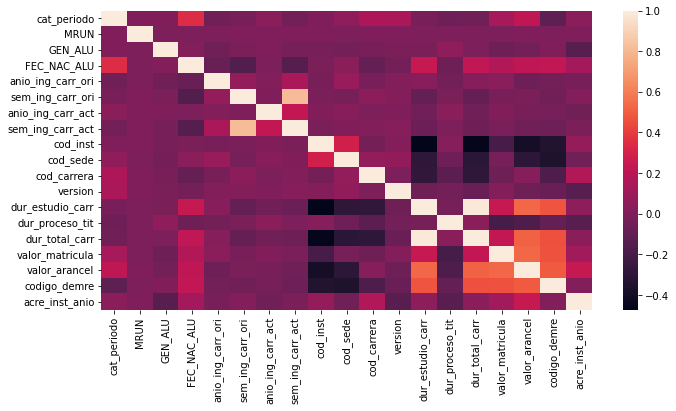

In [6]:
import seaborn
df_all = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9])
correlation = df_all.corr()
seaborn.heatmap(correlation)

Por otro lado, para aplicar *One Hot* a las columnas del año 2011, 2015 y 2019, primero se obtienen los tipos de cada columa en un dataframe, luego, para cada columna, se verfica si su tipo es ``object`` y si no corresponde a columnas con datos nominales arbitrarios o presentes en un solo año. Así, a las columnas que pasan el filtro se les aplica *One Hot* y se guarda su resultado en un archivo ``.csv``. El código especifico se muestra en Anexos.

En el bloque a continuación se seleccionan las columnas a utilizar del dataframe que no requieren ser transformadas, luego, se seleccionan las columnas que si requieren transformación y se quieren utilizar en la correlación. Entre ambos conjuntos se hace merge para obtener un solo DataFrame con toda la información.


In [7]:
cols_to_drop = ["costo_obtencion_titulo_diploma", "costo_tit_explicacion_observacion", "costo_proceso_titulacion", "forma_ingreso", "nivel_global", "nivel_carrera_1", "comuna_sede", "provincia_sede", "area_carrera_generica", "oecd_area", "oecd_subarea", "tipo_inst_1", "tipo_inst_3", "modalidad"]
df_sub_one_hot = df_sub.drop(columns=cols_to_drop)

one_hot_cols = ["nivel_carrera_2", "region_sede", "area_conocimiento", "tipo_inst_2", "acreditada_carr", "acreditada_inst", "jornada", "rango_edad", "requisito_ingreso", "tipo_plan_carr", "vigencia_carrera"]
for col in one_hot_cols:
    df_aux = pd.read_csv("one_hot/one_hot_" + col + ".csv")
    df_sub_one_hot = pd.merge(df_sub_one_hot, df_aux, left_index=True, right_index=True)

Sobre el DataFrame obtenido se busca la correlación y el resultado se muestra en un HeatMap adjuntado en Anexos.

<AxesSubplot:>

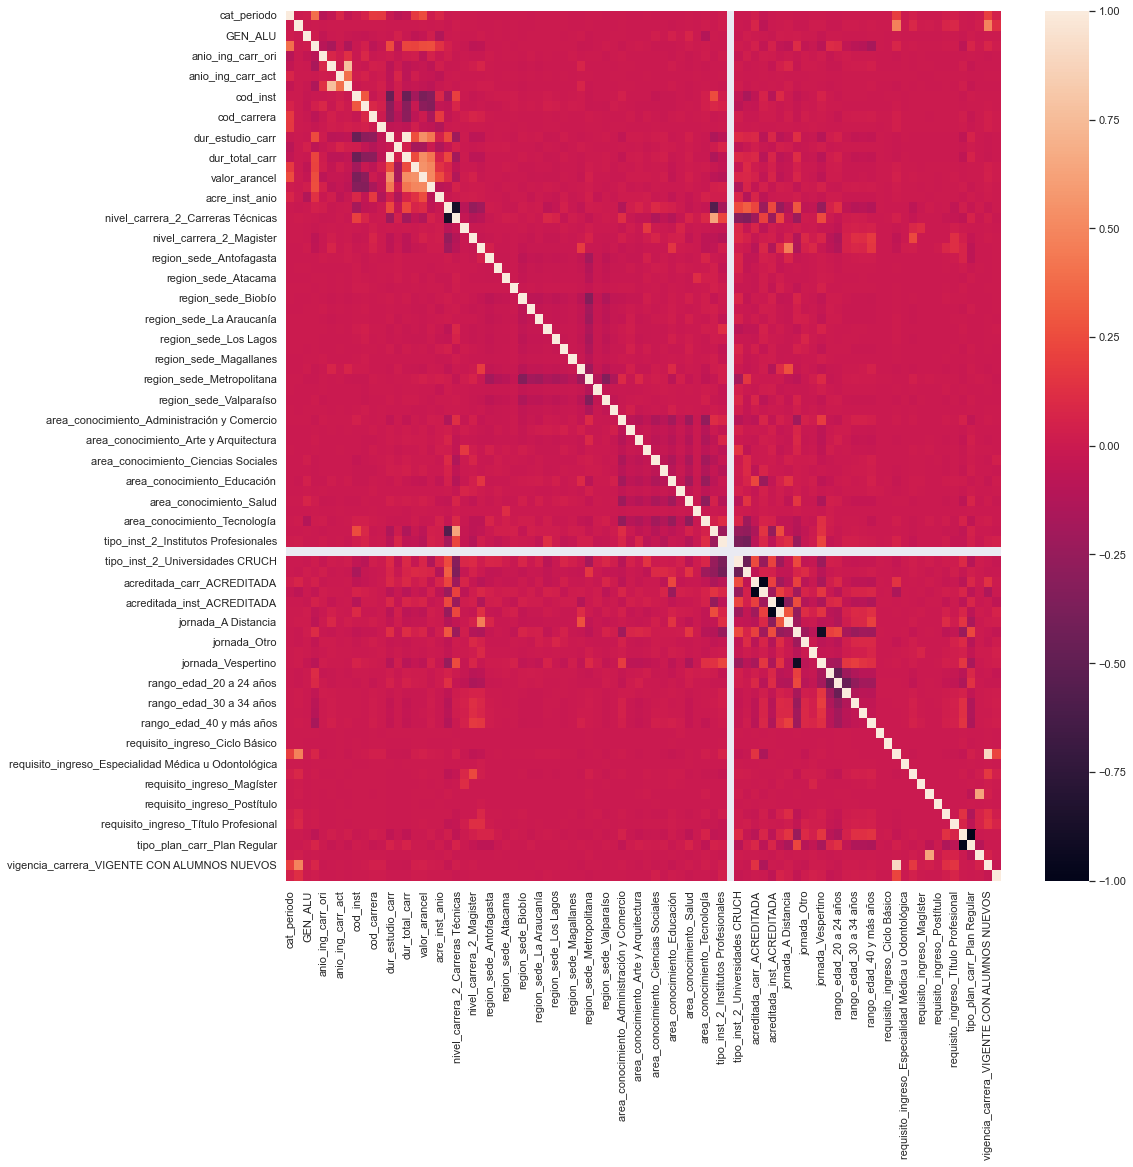

In [8]:
import seaborn

corr_sub = df_sub_one_hot.corr()
seaborn.set(rc={'figure.figsize':(16,16)})
seaborn.heatmap(corr_sub)

## Comportamientos de los datos

Como primera visualización es interesante analizar la distribución del costo de los aranceles entre las distintas regiones del país, como también el incremento de estos a lo largo de los años; para lo anterior se transforman los datos agrupando por rango de edad, genero y área de conocimiento, luego se cuenta la cantidad de aparaciones de cada triplete por año, por último se promedian los valores encontrados por año.

In [4]:
# se analiza por año y luego se promedia
d = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9]
h1 = []
i = 2010

for df in d:
    dfh = (df.query("area_conocimiento!='Sin área definida'")[["GEN_ALU","rango_edad", "area_conocimiento"]]
        .groupby(by=["GEN_ALU","rango_edad", "area_conocimiento"])
        .size()
        .reset_index()
        .rename(columns = {0:'total'})
        )
    dfh["anio"] = [i]*len(dfh)
    i+=1

    h1.append(dfh.copy())

#concatenación y mapeo
dfh1 = (pd.concat(h1)[["GEN_ALU","rango_edad", "area_conocimiento", "total"]]
                 .groupby(by=["GEN_ALU","rango_edad", "area_conocimiento"])
                 .mean()
                 .reset_index()
                )
dfh1[["GEN_ALU"]] = dfh1[["GEN_ALU"]].replace({1:"Hombre", 2:"Mujer"})
dfh1 = (dfh1.replace({"SIN INFORMACION": "Sin información", "Ciencias Sociales": "C. Sociales"}))

Así se obtiene la siguiente figura utilizando D3.js. Esta responde, finalmente, a la pregunta **¿Cómo se relaciona el área de conocimiento de la carrera con la edad y género de la persona que se matricula?**.

Para continuar comprendiendo los datos, nos planteamos la pregunta 
**¿Existe una correlación entre el costo de las carreras y su ubicación geográfica? ¿Varía esto a través de los años?**, para ello se selecciona el *código de la carrera*, *el valor del arancel* y *la región de la sede*, se eliminan los duplicados y se agrupan por región para obtener el promedio de los valores de arancel de las diferentes carreras. Lo anterior se hace para los años 2011, 2013, 2015, 2017 y 2019. Por último, se normaliza según la UF de cada año comprendiendo que los datos originales están en pesos chilenos y esta moneda se ve afectada por la inflación anualmente.
 
Los datos finales se expotaron al software Tableu para graficar.

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

d = [df1, df3, df5, df7, df9]
h2 = []
i = 2011

for df in d:
    try:
        dfh = df.query("vigencia_carrera!='NO VIGENTE'")
    except:
        dfh = df
    dfh = (dfh[["codigo_unico","valor_arancel", "region_sede"]]
           .drop_duplicates()[["region_sede", "valor_arancel"]]
           .groupby(["region_sede"])
           .mean()
           .reset_index()
           .rename(columns = {"valor_arancel":'arancel_promedio_pesos'})
        )
    dfh["anio"] = [i]*len(dfh)
    i+=1
    h2.append(dfh.copy())

df_arancel_original = pd.concat(h2)

df_UF = pd.read_csv("UF.csv").rename(columns={"Periodo": "anio"})
df_UF["UF"] = df_UF["UF"].astype(float)
df_arancel_original = pd.merge(df_arancel_original, df_UF, how = "inner", on = ["anio"])
df_arancel_original["arancel_promedio_UF"] = df_arancel_original.arancel_promedio_pesos/df_arancel_original.UF
df_arancel_original = df_arancel_original[["anio", "region_sede", "arancel_promedio_UF"]].sort_values("anio", ascending = False)

df_arancel_mapeado = (df_arancel_original.replace({'Arica y Parinacota': 1, 'Tarapacá': 2, 'Antofagasta': 3, 'Atacama': 4, 'Coquimbo': 5, 'Valparaíso': 6, 'Metropolitana': 7, "Lib. Gral B. O'Higgins": 8, 'Maule': 9, 'Ñuble': 10, 'Biobío': 11, 'La Araucanía': 12, 'Los Ríos': 13, 'Los Lagos': 14, 'Aysén': 15, 'Magallanes': 16}))
df_arancel_mapeo_regiones = pd.DataFrame({"Region": ['Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama', 'Coquimbo', 'Valparaíso', 'Metropolitana', "Lib. Gral B. O'Higgins", 'Maule', 'Ñuble', 'Biobío', 'La Araucanía', 'Los Ríos', 'Los Lagos', 'Aysén', 'Magallanes'], "Equivalente": list(range(1,17))})

Se extrae de la imagen que el valor (promedio) de los aranceles varían por región, siendo el valor más alto en la Región Metropolitana. También al analizar por año, se ve un incremento en Unidades de Fomento (UFs) del valor de los aranceles.

# Preguntas
1. ¿Se puede predecir las características de las matrículas para años futuros considerando los datos actuales? 
2. ¿Cuáles son las características y tendencias de las personas que se cambian de carrera? 
3. ¿Cuánto valor le agrega la acreditación a una carrera?
4. ¿Existe una relación entre costo de carrera y otras variables (numéricas?)
 
Siendo conscientes de que estamos trabajando mayoritariamente con variables categóricas, puede ser posible encontrar relaciones no lineales entre los atributos al vectorizarlos de manera más compleja que la entregada por *one hot encoding*, tal vez mediante vectores que comprendan cierta relación entre los valores del atributo, que posean cierta métrica (*word2vec* por ejemplo). De esta forma podemos permitirnos generar regresiones, predicciones o clustering más ricos en información relevante.


# Metodología 

Se describe a continuación, de manera detallada, la metodología para responder cada una de las 4 preguntas.

#### Pregunta 1:

Antes de esto hay que replantearse la pregunta, y para esto se debe definir concretamente cuáles son las características de las matrículas. En el caso de que fueran instancias, es decir, cada matrícula ingresada, entonces esta pregunta sería equivalente a la pregunta dos: debemos predecir características en personas, aunque en este caso no nos estaríamos centrando en personas que se cambian de carrera. 
En el caso de que fueran características macroscópicas, se deben evitar preguntas triviales, que involucren directamente indicadores como promedios, varianzas, número de sucesos, etc., que debieron ser estudiadas en el hito anterior. Una alternativa interesante podría ser generar clusters con los vectores totales (luego aplicar one hot) de cada instancia. y ver su evolución temporal: ¿dónde está el centro de cada uno, por año?, ¿cómo van cambiando ciertos indicadores de validación: Inercia, Separación, Cohesión,?, ¿cómo va cambiando la densidad de clusters?. Junto a esto podemos ir comparando con valores más tangibles como promedios, varianzas, etc. (ej: varianza regional del valor de arancel).

Para responder esta pregunta, se deben completar tres pasos previos:
- Utilizar nuevamente como vectorización preliminar one hot encoding para ingresar las instancias como vectores de dimensión igual al número de columnas. Habrá que tener cuidado interpretando los clusters y el espacio vectorial en el que residen. En este vector, por ejemplo, la columna de rango de edad (ej: 18 y 20 años) tendría igual peso que la del tipo de estudio superior (ej: Doctorado); los dos marcarían un 1 en su dimensión correspondiente, y en las demás, de su misma naturaleza, un 0.

- Generar Clustering con ciertos atributos seleccionados gracias a la exploración realizada en el hito 1. Con esto, y la correspondiente validación del clustering, podremos cuantificar potenciales patrones de agrupación.
    - Primeramente se utilizará el coeficiente de Silhouette para verificar la viabilidad del cluster, si fuese negativo, se trataría de generar un vector (por instancia) preliminar compuesto de otra manera, o también podría ser interesante crear para cada columna un vector y comprobar si podemos, mediante algún tipo de operación, unificarlos todos, de forma que el clustering de cuenta de estructuras particulares.
    - Se hará uso de la métrica Cohesión, Separación e Inercia, junto a la visualización de su matriz de proximidad, una vez encontrado un coeficiente de Silhouette positivo, con el propósito de seguir evaluando las estructuras subyacentes en los datos. 
    - Podemos tomar este proceso como una forma sistemática de vectorizar instancias, de modo que luego quedar satisfechos (o de plano probar con varias) con un encoding podremos proseguir al paso 3.

- Luego de tener un vector para cada instancia, podemos reducir su dimensionalidad y  visualizar los clusters, como primera opción mediante PCA, pero existen varias por explorar. Luego de esto tendremos instancias medianamente interpretables, y que facilitarán su manejo en algoritmos de Regresión. Como ya se dijo en un inicio, otro posible estudio es el de la dinámica de los cluster, sus propiedades (ej: su densidad), y la correlación que estas variables guardan con indicadores macroscópicos en las matrículas(ej: valor arancel medio, arancel medio por región, etc.).

**Nota: Esta pregunta está mayormente respondida y diseñada por Alonso Uribe**

#### Pregunta 2:
 
Para responder la pregunta 2 primero es importante notar que es posible determinar quienes se han cambiado de carrera con los datos actuales, por lo tanto, se utilizará clasificación para buscar perfiles de personas que podrían cambiarse de carrera en el futuro. Así, las clases posibles son “se cambió de carrera” y “no se cambió de carrera”, y nuestra clase positiva corresponde a quienes sí se han cambiado de carrera, pues es lo que queremos evitar.

Entonces lo primero es disminuir la dimensionalidad de los datos, para esto se agregará una nueva columna que describe el tiempo que lleva la persona cursando su carrera actual, así esta resume la información de las columnas ``cat_periodo`` y ``ANIO_ING_CARR_ACT``, su creación sería a través de la resta de los años de ``ANIO_ING_CARR_ACT`` y ``cat_periodo``. Por otro lado, se requiere una columna que indique la clase de la fila, la que resumiría la información de las columnas ``ANIO_ING_CARR_ORI``, ``SEM_ING_CARR_ORI``, ``ANIO_ING_CARR_ACT`` y ``SEM_ING_CARR_ACT``; para obtenerla haremos una restricción con la siguiente query: [agregar query].
Adicionalmente se mantendremos las siguientes columnas;
- GEN_ALU
- RANGO_EDAD
- TIPO_INST_3
- JORNADA
- TIPO_PLAN_CARR
- DUR_ESTUDIO_CARR
- NIVEL_CARRERA_1 o NIVEL_GLOBAL
- VALOR_MATRICULA
- VALOR_ARANCEL
- OECD_AREA
- ACREDITADA_CARR o ACREDITADA_INST
- FORMA_DE_INGRESO

Donde se incluye una sola columna relacionada a la duración de la carrera pues se observa una estrecha relación entre DUR_ESTUDIO_CARR y DUR_TOTAL_CARR; una correlación de 0.99. A pesar de esto siguen siendo demasiadas columnas, por lo que aplicaremos la transformación One Hot sobre los datos restringidos y eliminaremos las columnas que tengan correlación cercana a 1 o a -1. 
Una vez determinadas las columnas a utilizar se busca encontrar el mejor algoritmo de clasificación, para lo cual se evaluarán las métricas de los algoritmos **KNN**, **Naive Bayes**, **Support Vector Machine** y **Árbol de Decisión**. Estas métricas serán evaluadas con la técnica **holdout**, dejando $1/3$ de los datos para entrenar y aplicando estratificación sobre las particiones, pero, además, se observará el desempeño aplicando **subsampling** sobre la clase negativa, **oversampling** sobre la clase positiva y el caso en que no se aplica ninguno, esto al considerar que son pocos los alumnos que se cambian de carrera anualmente. Luego, usaremos matriz de confusión para observar el desempeño, poniendo especial atención en la métrica **recall**, dado que no es un gran problema tener falsos positivos, pues lo que se busca es mejorar la información entregada a estudiantes previo a su primera matrícula, considerando quienes tienen un perfil con mayor probabilidad de deserción de su primera carrera.

**Nota: Esta pregunta está mayormente respondida y diseñada por Javiera Alegria**

#### Pregunta 3:

La dificultad de esta pregunta radica en definir el concepto de **valor** y preprocesar los datos de manera favorable, que faciliten el análisis con esto en mente se precenta la siguiente metodología por pasos.

- Definir columnas numéricas a utilizar: Se eligen ``VALOR_ARANCEL``, ``GEN_ALU``,``FEC_NAC_ALU``, ``ANIO_ING_CARR_ORI``, ``CAT_PERIODO``, ``DUR_TOTAL_CARR``, ``ACRE_INS_ANIO``, ``ACRE_INS_DESDE_HASTA``. Estas columnas describen de buena forma las carreras, sus periodos de acreditación y precios, caracterizando también a sus alumnos. Los datos se manejan en forma de DataFrames de pandas, y realizando un subset de las columnas de interes.


- Definir columnas categóricas a utilizar: Se eligen ``TIPO_INS_2``, ``NOMB_INST``,``CINE_F_13_AREA``, ``ACREDITADA_CARR``, ``NIVEL_CARR_2``, ``REGION_INST``. De la misma forma que el punto anterior, se agregan estas columnas al filtrado quedando un total de 14 columnas, achicando así la cantidad de datos a procesar, recordando que el dataset original contiene 49 columnas.

- Preprocesado: Creación de nuevas columnas para obtener información util.
    -``EDAD_ALU``: Edad del estudiante al cual corresponde la matrícula, hace más directo el análisis de datos, variable numérica.
    -``ANIOS_U``: Años que el estudiante lleva en la universidad, hace más directo el filtrado de datos, variable numérica.
    -``ANIOS_RESTANTES ACRE``: Años que restan para que acabe la acreditación de la carrera, variable numérica.

- Preprocesado: Modificación de variables.

    - ``GEN_ALU``: Se cambia la variable de numérica a categórica.
    - ``ACRE_INST_ANIO``: Se modifican los valores nan por 0.
    - Se dejan fuera del análisis las matrículas con valores nan, o irregulares, en alguna columna, que representan menos del 1%.

- Se obtienen histogramas de cada una de las variables (o columnas), diferenciando entre cuenta de acreditados y no acreditados, con el fin de analizar singularidades.
 
- Se obtienen métricas estadísticas de los histogramas como media, mediana y desviación estandard.

- Se analiza mediante gráficos (matplotlib) la evolución de los estadisticos durante los años desde 2011 al 2018. Adicionalmente se analiza la incorporación de alumnos nuevos a carreras específicas que durante esste tiempo pierdan su acreditación.  Lo mismo anterior anallizando el valor de matrícula de estas carreras.

- Se realiza clustering (kmeans y herárquico), sumado a metodos de reducción de dimencionalidad (PCA , t-sne y UMAP), para caracterizar y visualizar las particularidades de la acreditación y como se agrupan distintas instituciones y carreras.

**Nota: Esta pregunta está mayormente respondida y diseñada por Eri*

#### Pregunta 4:
 
Propuesta experimental:
- Dado que esta pregunta es de carácter descriptivo, se propone utilizar técnicas de clustering para encontrar automáticamente  si hay relaciones de forma natural entre la variable valor del arancel  y otras variables numéricas, como la duración de la carrera y los años de acreditación. 
- También se propone buscar relaciones del valor del arancel con variables categóricas como la modalidad (presencial, semi-presencial o no presencial) y el tipo de jornada (diurno, vespertino), realizando codificaciones numéricas a estas categorías para poder aplicar clustering.
- Se probarán técnicas de clustering particionales (K-Means) y jerárquicos.
- Se estimará el k en K-Means utilizando la métrica SSE.
- Se validará la calidad de los clustering usando la medida SSE, Matriz de similitud y el coeficiente de Silhouette. Se seleccionarán aquellos clustering que entreguen resultados más significativos.
- A partir de los resultados obtenidos, se generarán visualizaciones del clustering y dendrogramas para identificar posibles outliers y realizar un post- procesamiento de los datos en caso de ser necesario, con el objetivo de reducir el SSE.

**Nota: Esta pregunta está mayormente respondida y diseñada por Adriana Concha**

# Anexos
Descripción del dataset dado por el Mineduc [aquí](http://datos.mineduc.cl/datasets/178941-er-base-de-datos-matricula-en-educacion-superior.download/).




El código utilizado para limpiar los datos es el siguiente:

In [ ]:
import numpy as np
#dfX corresponde al dataframe con los datos del año X
d = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9]

for i in range(len(d)):
    print(i)
    d[i] = d[i].replace(r'^\s+$', np.nan, regex=True)
    d[i]["anio_ing_carr_act"] = d[i]["anio_ing_carr_act"].replace(9995, np.nan, regex=True)
    d[i]["anio_ing_carr_act"] = d[i]["anio_ing_carr_act"].replace(0, np.nan, regex=True)
    d[i]["anio_ing_carr_ori"] = d[i]["anio_ing_carr_ori"].replace(9995, np.nan, regex=True)
    d[i]["FEC_NAC_ALU"] = d[i]["FEC_NAC_ALU"].replace("190001", np.nan, regex=True)
    d[i]["FEC_NAC_ALU"] = d[i]["FEC_NAC_ALU"].replace(190001, np.nan, regex=True)
    d[i] = d[i].replace("SIN INFORMACION", np.nan, regex=True)
    d[i][["valor_arancel"]] = d[i][["valor_arancel"]].astype(np.float64)
    name = f'{2010+i}'
    d[i].to_csv(name+'.csv',index=False)

El siguiente bloque muestra el código utilizado para aplicar One Hot sobre las columnas de los años 2011, 2015 y 2019, tal como se detalla en la sección Correlación entre Columnas de Análisis Exploratorio.

In [ ]:
df_sub = pd.concat([df1, df5, df9])

# Se obtienen los tipos de cada columa en un dataframe
df_sub_datatypes = (pd.DataFrame(df_sub.dtypes)
                    .reset_index()
                    .rename(columns = {0:'tipo', 'index' : 'columna'})
                    )

# para cada columna...
cols_name = list(df_sub)
init = cols_name.index("costo_proceso_titulacion") + 1
for i in range(init, len(df_sub_datatypes)):
    # Si es que es de tipo object...
    if str(df_sub_datatypes.iloc[i][1]) == 'object':
        col_name = df_sub_datatypes.iloc[i][0]
        # y no corresponde a una de las siguientes...
        if (col_name in ["codigo_unico", "nomb_inst", "nomb_sede", "nomb_carrera", "acre_inst_desde_hasta"]
            or col_name in ["costo_obtencion_titulo_diploma", "costo_tit_explicacion_observacion", "costo_proceso_titulacion"]) :
            continue

        cols_name.remove(col_name)
        # se le aplica la transformación One Hot y se guarda.
        df_one_hot = pd.get_dummies(df_sub[[col_name]], prefix=col_name)

        df_one_hot.to_csv("one_hot/one_hot_" + col_name + ".csv", index = False)




El HeatMap de la sección Correlación entre columnas de Análisis Exploratorio se muestra a continuación


A continuación se muestra el código utilizado para obtener los gráficos relativos a la cantidad de datos anuales y al porcentaje de datos nulos en cada año.

In [2]:
d = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9]
nulos, l, l_total, anno, porcentaje = [], [], [], [], []
i = 2010

for df in d:
    n = 0
    for v in list(df.isnull().sum()):
        n += v
    anno.append(i)
    nulos.append(n)
    t = len(df)*len(list(df))*1.0
    l.append(len(df))
    porcentaje.append((n/t)*100)
    i+=1

<ipython-input-3-c023cbe8d503>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_total_datos.show()
<ipython-input-3-c023cbe8d503>:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_porcentaje_nulo.show()


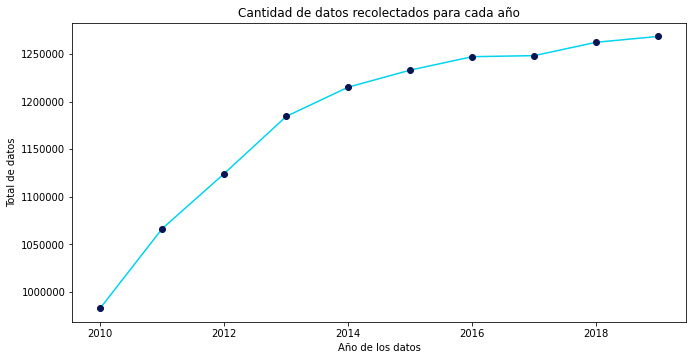

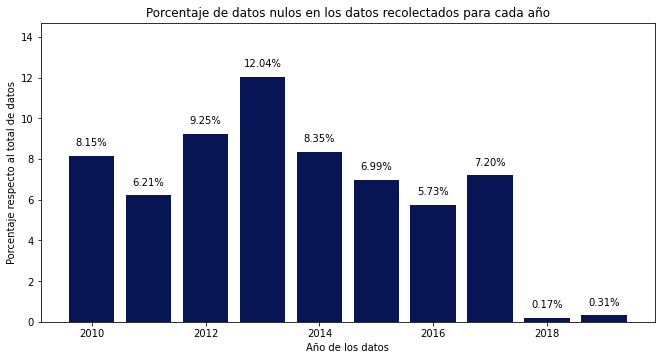

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [11, 5.5]


fig_total_datos = plt.figure()
fig_total_datos.clf()
ax_total_datos = fig_total_datos.add_subplot(111)
#ax_total_datos.bar(anno, l, align='center', alpha=0.7, color = 'darkorange', label = "Entradas en la tabla")
ax_total_datos.plot(anno, l, alpha=1, color = '#00d4f0', label = "Entradas en la tabla")
ax_total_datos.plot(anno, l, 'o', alpha=1, color = '#071554', label = "Entradas en la tabla")
ax_total_datos.set_ylabel("Total de datos")
ax_total_datos.set_xlabel("Año de los datos")
ax_total_datos.set_title("Cantidad de datos recolectados para cada año")
#set off Scientific notation from Y-axis
ax_total_datos.get_yaxis().get_major_formatter().set_useOffset(False)
ax_total_datos.get_yaxis().get_major_formatter().set_scientific(False)
#ax_total_datos.legend(loc="best")
fig_total_datos.savefig("total_datos.png", transparent=False)
fig_total_datos.show()


fig_porcentaje_nulo = plt.figure()
fig_porcentaje_nulo.clf()
ax_porcentaje_nulo = fig_porcentaje_nulo.add_subplot(111)
graph = ax_porcentaje_nulo.bar(anno, porcentaje, align='center', color = '#071554', label = "Porcentaje de datos nulos")
ax_porcentaje_nulo.bar([2016], [14], align='center', alpha=0)
ax_porcentaje_nulo.set_ylabel("Porcentaje respecto al total de datos")
ax_porcentaje_nulo.set_xlabel("Año de los datos")
ax_porcentaje_nulo.set_title("Porcentaje de datos nulos en los datos recolectados para cada año")
#fig_porcentaje_nulo.legend(loc="upper left")
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    num = str(porcentaje[i]).split(".")
    t = num[0] +'.' + num[1][:2]+'%'
    plt.text(x+width/2,
             y+0.5+height*1,
             t,
             ha='center')
             #weight='bold')
    i+=1
fig_porcentaje_nulo.savefig("porcentaje_datos_nulos.png", transparent=False)
fig_porcentaje_nulo.show()